In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_full_combi = pd.read_csv('./full_combinatorial_testing/data/full_combinatorial_testing_evaluation.csv')
df_t_way = pd.read_csv('./t_way_testing/data/t_way_testing_evaluation.csv')
df_var = pd.read_csv('./variance_bounded_testing_method/data/variance_bounded_testing_method_evaluation_dict.csv')

# Add a new column to identify the source DataFrame
df_full_combi['source'] = 'Full_Combinatorial_Testing'
df_t_way['source'] = 'T_Way_Testing'
df_var['source'] = 'Variance_Bounded_Testing'

df_full_combi = df_full_combi.sort_values(by='number_of_test_cases')
df_t_way = df_t_way.sort_values(by='number_of_test_cases')
df_var = df_var.sort_values(by='number_of_test_cases')

# Concatenate the DataFrames
combined_df = pd.concat([df_full_combi, df_t_way, df_var], ignore_index=True)

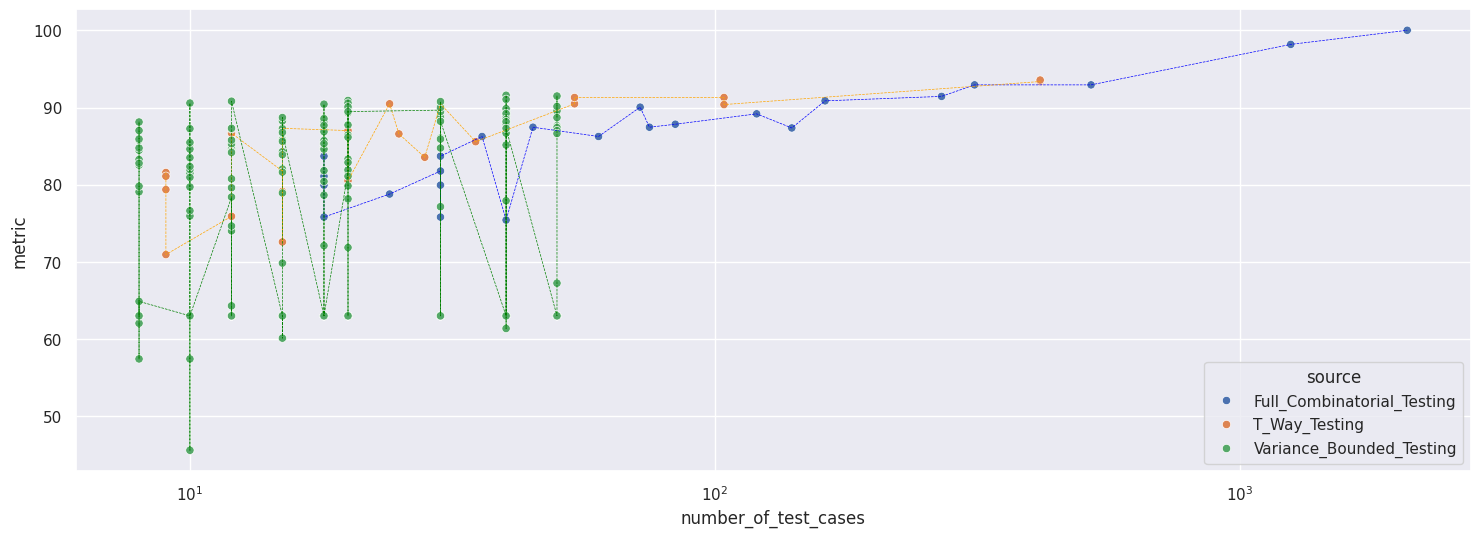

In [2]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(18, 6))
# Plot the responses for different events and regions
sns.scatterplot(x="number_of_test_cases", y="metric",
             hue="source",
             data=combined_df)
plt.plot(df_full_combi['number_of_test_cases'], df_full_combi['metric'], color='blue', linestyle='--', linewidth=0.5)  # Line connecting the points
plt.plot(df_t_way['number_of_test_cases'], df_t_way['metric'], color='orange', linestyle='--', linewidth=0.5)  # Line connecting the points
plt.plot(df_var['number_of_test_cases'], df_var['metric'], color='green', linestyle='--', linewidth=0.5)  # Line connecting the points
plt.xscale('log')

In [3]:
def filter_min_max_for_value(df, group_col, target_col, specific_value, min_max='min'):
    """
    Filter the DataFrame to include only rows with the maximum target_col value
    for a specific value in the group_col.

    Parameters:
    - df: pandas.DataFrame - Input DataFrame.
    - group_col: str - The column to group by.
    - target_col: str - The column whose maximum value is considered.
    - specific_value: value - The specific value in group_col to filter by.

    Returns:
    - pandas.DataFrame with rows having the maximum target_col for the specific value in group_col.
    """
    # Filter the DataFrame for the specific value
    filtered_df = df[df[group_col] == specific_value]
    
    # Check if the filtered DataFrame is empty
    if filtered_df.empty:
        print('something wrong')
        return filtered_df  # Return empty DataFrame if no rows match

    if min_max == 'min':
        # Find the minimum value in the target column for the filtered DataFrame
        max_value = filtered_df[target_col].min()
    else:
        # Find the maximum value in the target column for the filtered DataFrame
        max_value = filtered_df[target_col].max()
        
    # Return rows that have the maximum value in the target column
    result_df = filtered_df[filtered_df[target_col] == max_value]

    return result_df

In [4]:
test_case_values = df_full_combi['number_of_test_cases'].values
result_df = pd.DataFrame()

for test_case_value in test_case_values:
    result_df = pd.concat([result_df, filter_min_max_for_value(df_full_combi, 'number_of_test_cases', 'metric', 
                                                               specific_value=int(test_case_value), min_max='max')], ignore_index=True)
df_full_combi_filtered = result_df

####################################

test_case_values = df_t_way['number_of_test_cases'].values
result_df = pd.DataFrame()

for test_case_value in test_case_values:
    result_df = pd.concat([result_df, filter_min_max_for_value(df_t_way, 'number_of_test_cases', 'metric', 
                                                               specific_value=int(test_case_value), min_max='max')], ignore_index=True)
df_t_way_filtered = result_df

####################################

test_case_values = df_var['number_of_test_cases'].values
result_df = pd.DataFrame()

for test_case_value in test_case_values:
    result_df = pd.concat([result_df, filter_min_max_for_value(df_var, 'number_of_test_cases', 'metric', 
                                                               specific_value=int(test_case_value), min_max='max')], ignore_index=True)
df_var_filtered = result_df

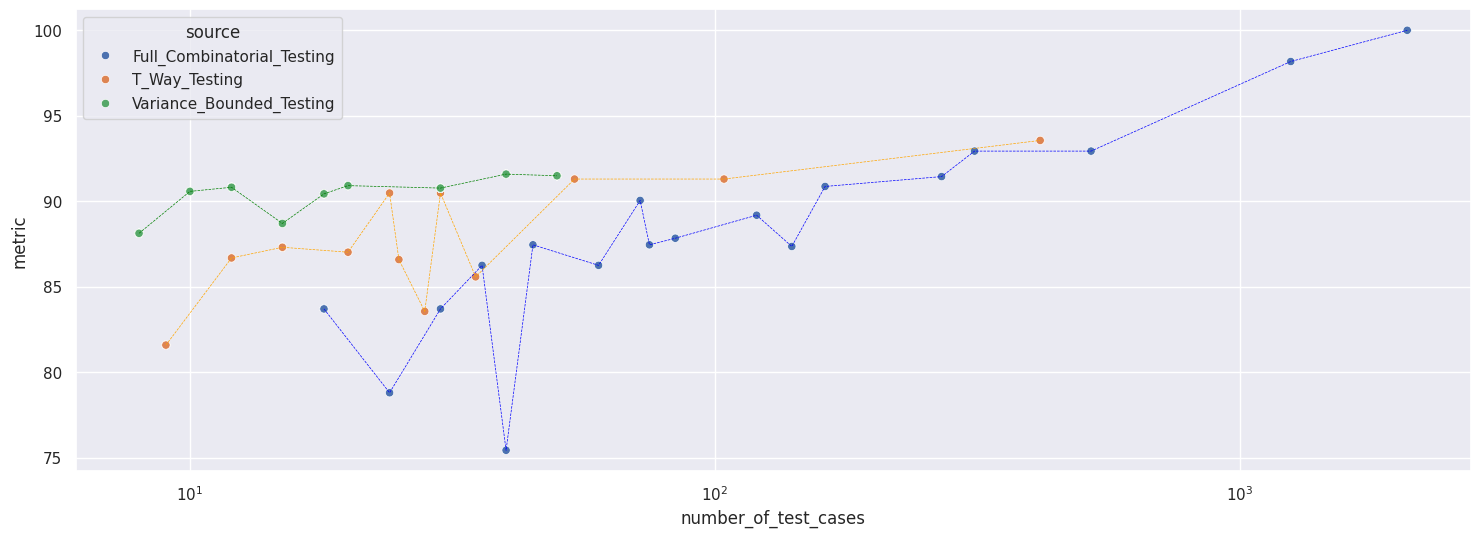

In [5]:
combined_df = pd.concat([df_full_combi_filtered, df_t_way_filtered, df_var_filtered], ignore_index=True)

sns.set_theme(style="darkgrid")
plt.figure(figsize=(18, 6))
# Plot the responses for different events and regions
sns.scatterplot(x="number_of_test_cases", y="metric",
             hue="source",
             data=combined_df)
plt.plot(df_full_combi_filtered['number_of_test_cases'], df_full_combi_filtered['metric'], color='blue', linestyle='--', linewidth=0.5)  # Line connecting the points
plt.plot(df_t_way_filtered['number_of_test_cases'], df_t_way_filtered['metric'], color='orange', linestyle='--', linewidth=0.5)  # Line connecting the points
plt.plot(df_var_filtered['number_of_test_cases'], df_var_filtered['metric'], color='green', linestyle='--', linewidth=0.5)  # Line connecting the points
plt.xscale('log')

<Axes: xlabel='metric', ylabel='loc'>

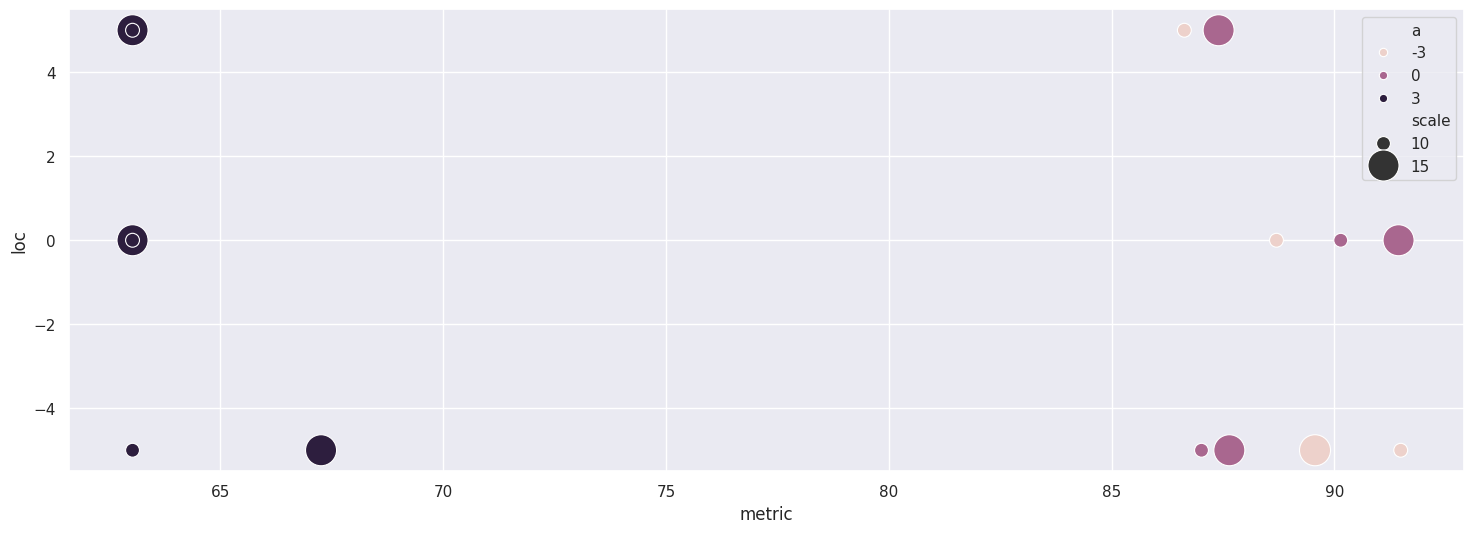

In [6]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(18, 6))
filtered_df = df_var[df_var['number_of_test_cases'] == 50]
# Plot the responses for different events and regions
sns.scatterplot(y="loc", x="metric",
             hue="a",
             data=filtered_df,
             size="scale",
             sizes = ([100,500]))

In [8]:
test_case_values = df_full_combi['number_of_test_cases'].values
result_df = pd.DataFrame()

for test_case_value in test_case_values:
    result_df = pd.concat([result_df, filter_min_max_for_value(df_full_combi, 'number_of_test_cases', 'absolute_fail_ratio_difference', 
                                                               specific_value=int(test_case_value), min_max='min')], ignore_index=True)
df_full_combi_filtered = result_df

####################################

test_case_values = df_t_way['number_of_test_cases'].values
result_df = pd.DataFrame()

for test_case_value in test_case_values:
    result_df = pd.concat([result_df, filter_min_max_for_value(df_t_way, 'number_of_test_cases', 'absolute_fail_ratio_difference', 
                                                               specific_value=int(test_case_value), min_max='min')], ignore_index=True)
df_t_way_filtered = result_df

####################################

test_case_values = df_var['number_of_test_cases'].values
result_df = pd.DataFrame()

for test_case_value in test_case_values:
    result_df = pd.concat([result_df, filter_min_max_for_value(df_var, 'number_of_test_cases', 'absolute_fail_ratio_difference', 
                                                               specific_value=int(test_case_value), min_max='min')], ignore_index=True)
df_var_filtered = result_df

combined_df = pd.concat([df_full_combi_filtered, df_t_way_filtered, df_var_filtered], ignore_index=True)

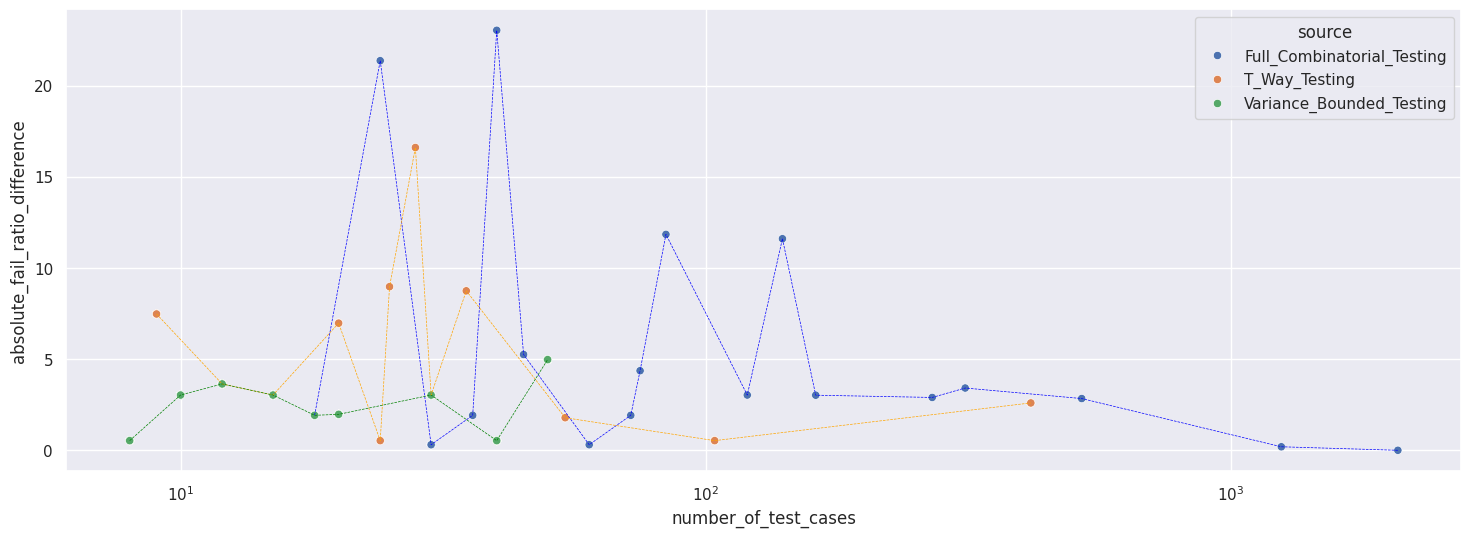

In [9]:
# Plot the responses for different events and regions
plt.figure(figsize=(18, 6))
sns.scatterplot(x="number_of_test_cases", y="absolute_fail_ratio_difference",
             hue="source",
             data=combined_df)
plt.plot(df_full_combi_filtered['number_of_test_cases'], df_full_combi_filtered['absolute_fail_ratio_difference'], color='blue', linestyle='--', linewidth=0.5)  # Line connecting the points
plt.plot(df_t_way_filtered['number_of_test_cases'], df_t_way_filtered['absolute_fail_ratio_difference'], color='orange', linestyle='--', linewidth=0.5)  # Line connecting the points
plt.plot(df_var_filtered['number_of_test_cases'], df_var_filtered['absolute_fail_ratio_difference'], color='green', linestyle='--', linewidth=0.5)  # Line connecting the points
plt.xscale('log')